In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
data = pd.read_csv("1601384482_8387134_image_new_test.txt", sep=',', header=None)
data

0    1    2    3    4    5    6    7    8    9    ...  774  775  776  \
0       0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1       0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
2       0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
3       0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
4       0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
9995    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
9996    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
9997    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
9998    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
9999    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   

      777  778  779  780  781  782  783  
0       0    0    0    0    0    0    0  
1       0    0    0    0    0    0    0  
2       0    0    0    0    0    0    0  
3       0    0    0    0    0    0    0  
4       0    0    0    0    0    0    0  
...   ...  ...  ...  ...  ...  ...  ...  
9995    0    0    0    0    0    0    0  
9996    0    0    0    0    0    0    0  
9997    0    0    0    0    0    0    0  
9998    0    0    0    0    0    0    0  
9999    0    0    0    0    0    0    0  

[10000 rows x 784 columns]

In [4]:
data.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
779    0
780    0
781    0
782    0
783    0
Length: 784, dtype: int64

<ipython-input-5-eadebb2d7459>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


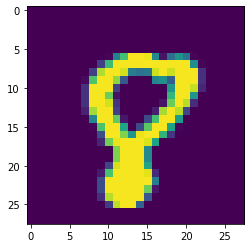

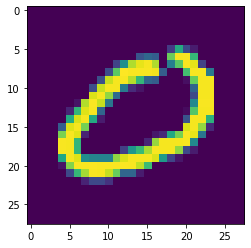

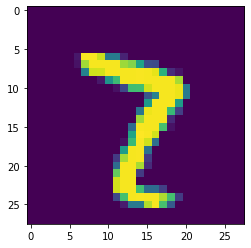

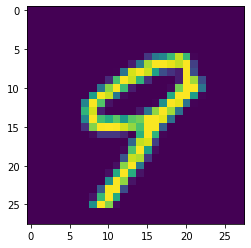

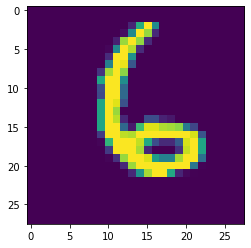

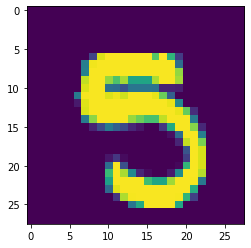

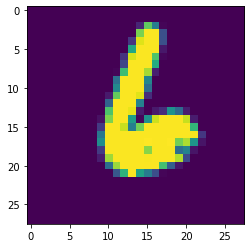

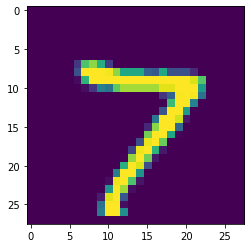

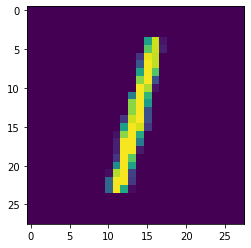

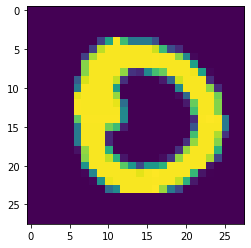

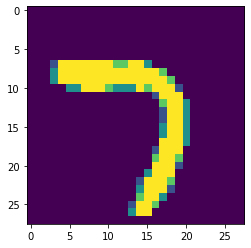

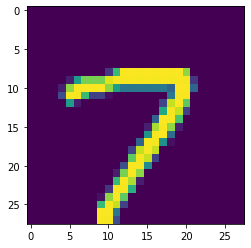

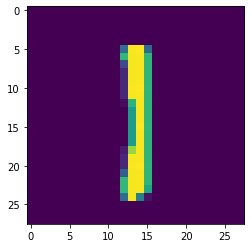

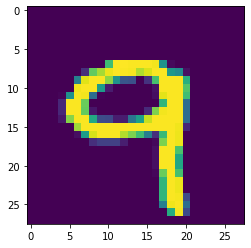

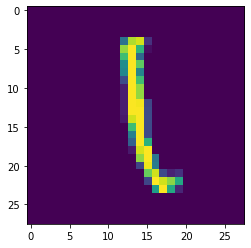

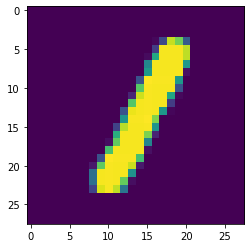

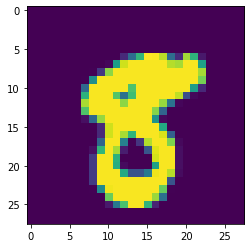

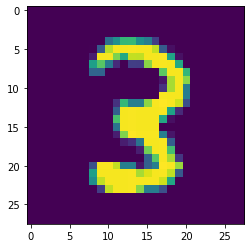

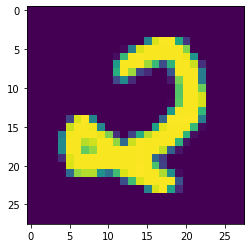

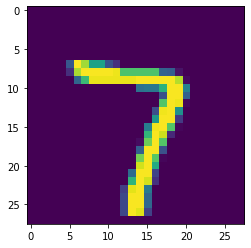

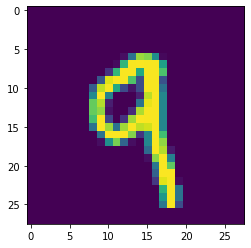

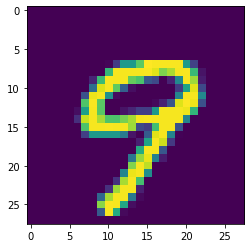

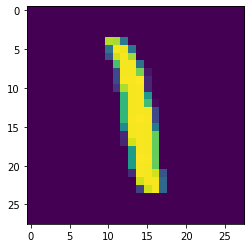

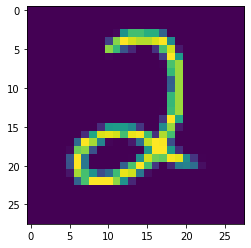

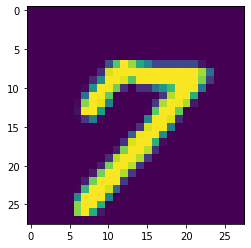

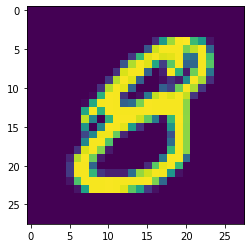

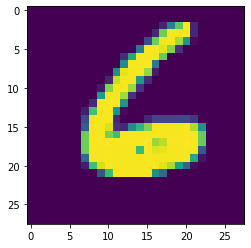

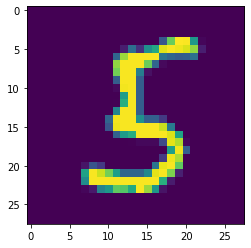

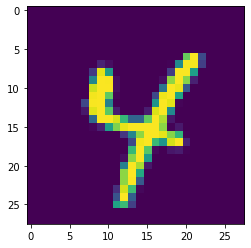

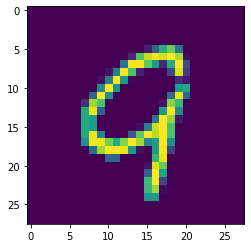

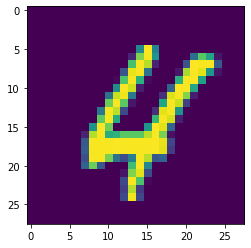

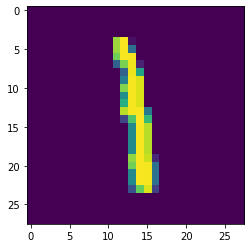

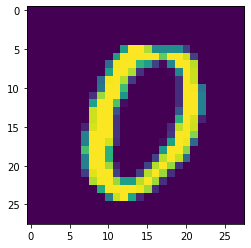

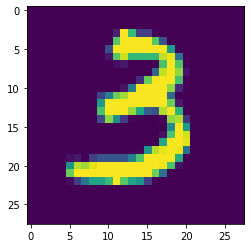

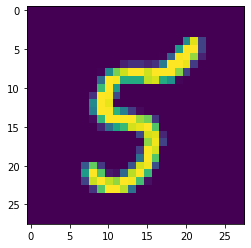

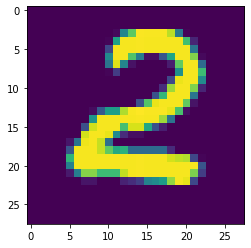

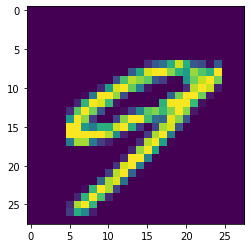

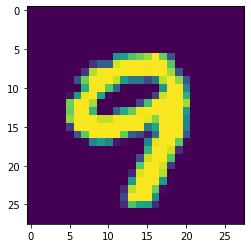

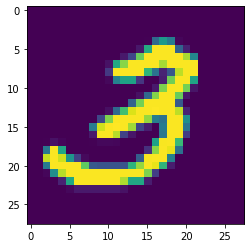

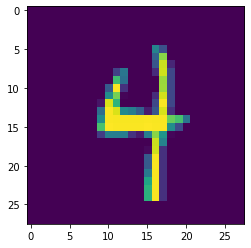

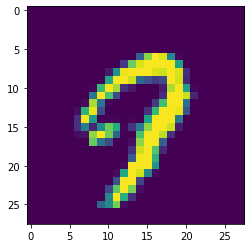

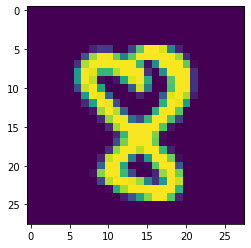

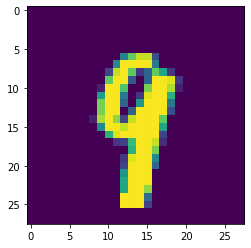

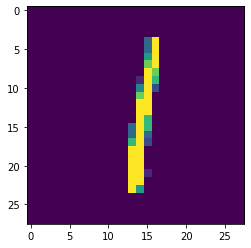

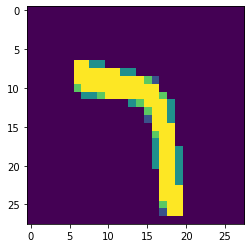

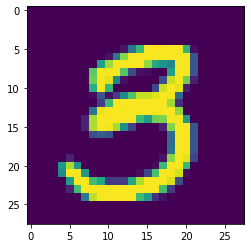

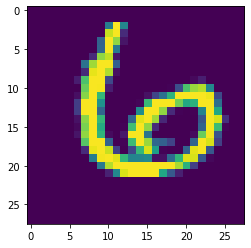

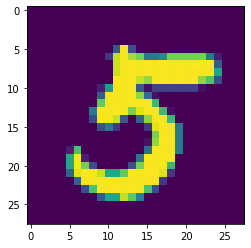

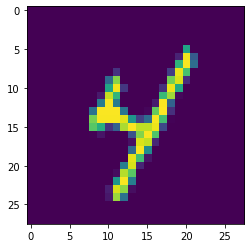

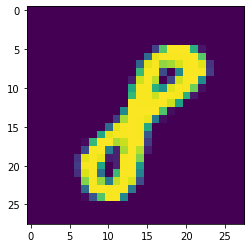

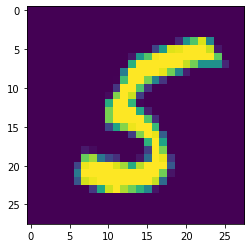

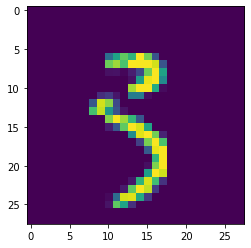

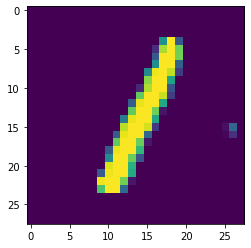

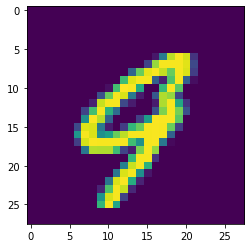

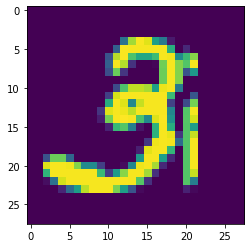

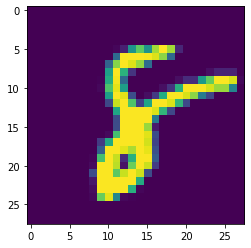

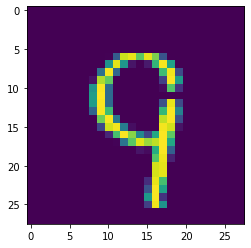

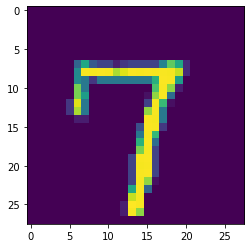

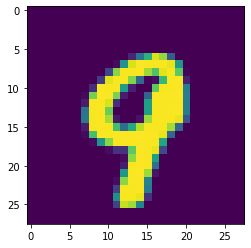

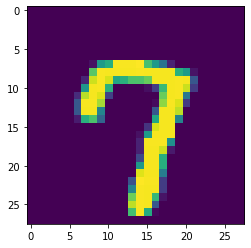

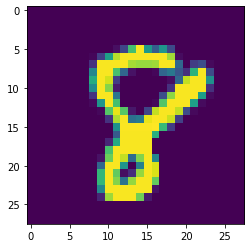

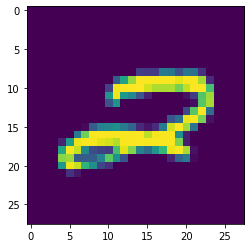

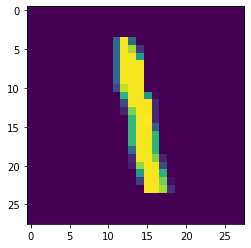

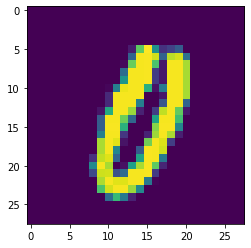

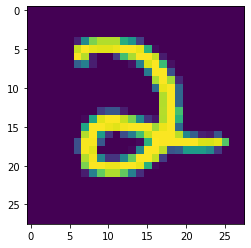

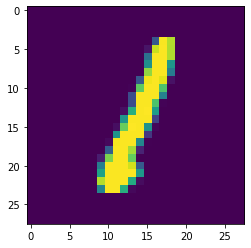

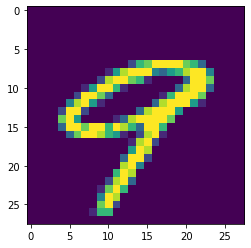

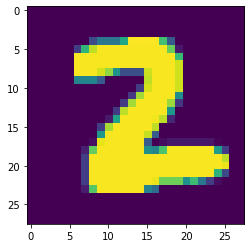

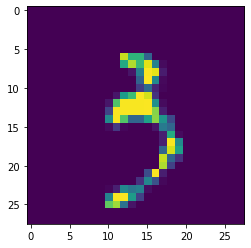

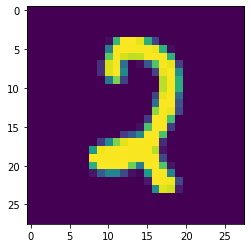

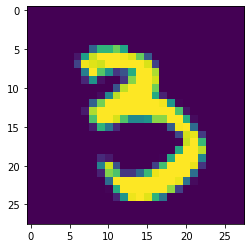

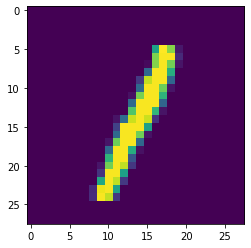

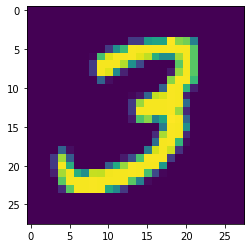

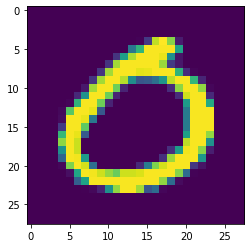

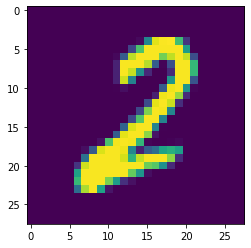

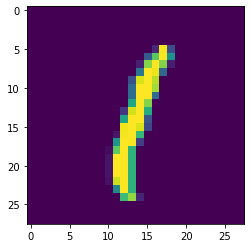

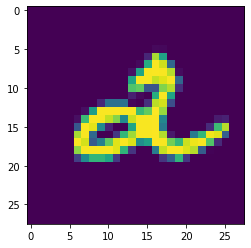

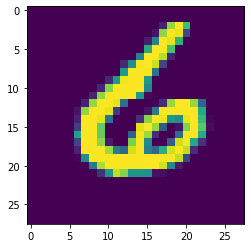

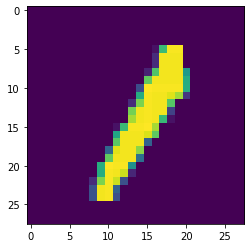

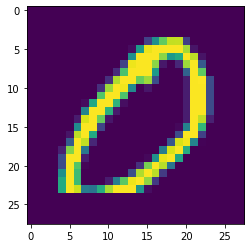

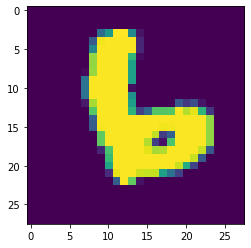

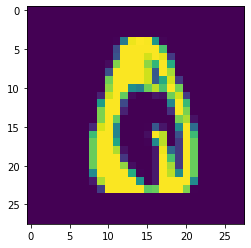

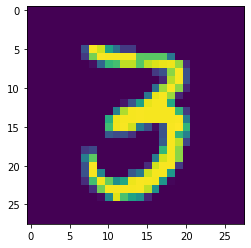

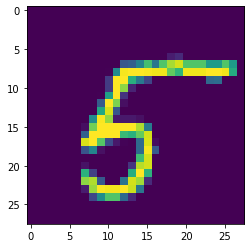

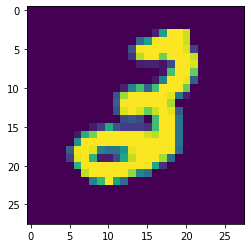

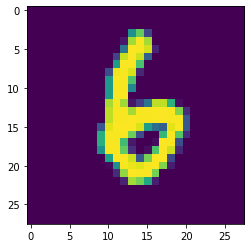

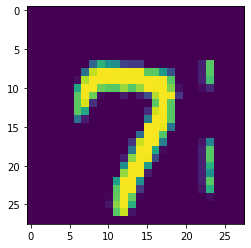

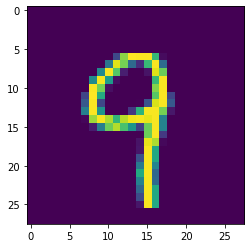

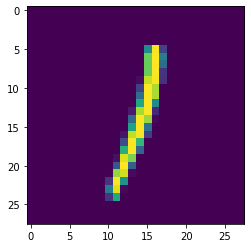

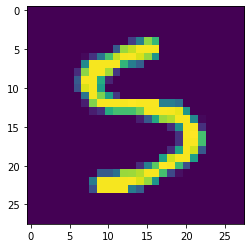

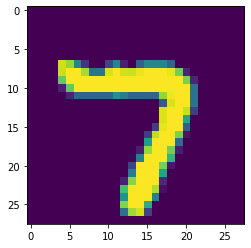

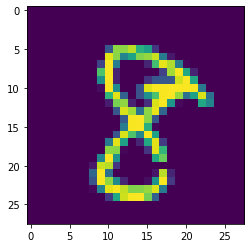

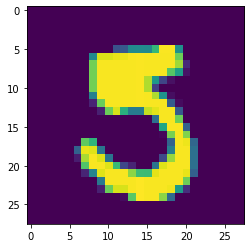

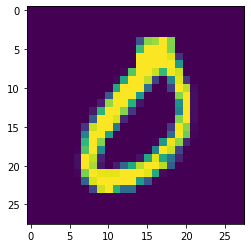

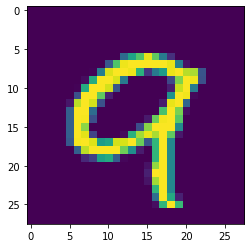

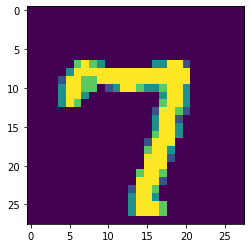

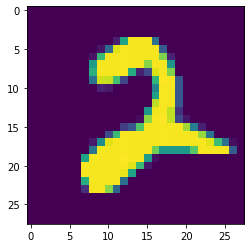

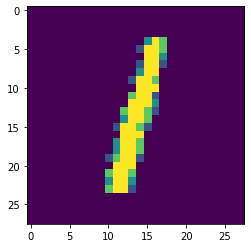

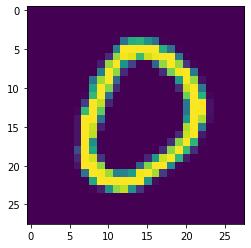

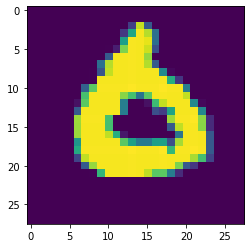

In [5]:
test_data = data.to_numpy()
# displaying the digits as 28x28 images
for i in range(100):
    plt.figure()
    plt.imshow(test_data[i,:].reshape(28,28))

In [6]:
# normalization
def normalize(df):
    return df/255.0

In [7]:
data = normalize(data)
data

0    1    2    3    4    5    6    7    8    9    ...  774  775  776  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
9995  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
9996  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
9997  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
9998  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
9999  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

      777  778  779  780  781  782  783  
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...   ...  ...  ...  ...  ...  ...  ...  
9995  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
9996  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
9997  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
9998  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
9999  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[10000 rows x 784 columns]

In [8]:
# Applying PCA for dimensionality reduction
pca = PCA().fit(data)
features = range(pca.n_components_)

In [9]:
# finding optimum number of principal components based on variance threshold
variance_boy = 0.81
y_interp = np.interp(variance_boy, pca.explained_variance_ratio_.cumsum(), features)
print(y_interp)

42.78038630534458


Text(0, 0.5, 'variance %')

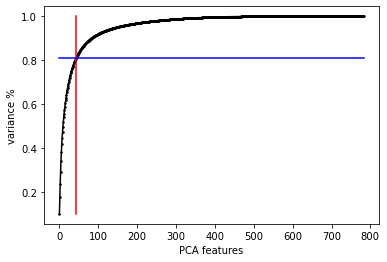

In [10]:
plt.plot(features, pca.explained_variance_ratio_.cumsum(), color = 'black', marker = '.', markersize = 3)
plt.plot([y_interp]*784, pca.explained_variance_ratio_.cumsum(), color = 'red')
plt.plot(features, [variance_boy]*784, color = 'blue')

plt.xlabel('PCA features')
plt.ylabel('variance %')

as we can see from the graph, the optimal number of components is around 42

In [11]:
# PCA

pca = PCA(n_components=int(np.floor(y_interp)))
principalComponents = pca.fit_transform(data)

PCA_components = pd.DataFrame(principalComponents)
PCA_components.shape

(10000, 42)

In [12]:
from sklearn.manifold import TSNE
data_TSNE = TSNE(n_components=2).fit_transform(PCA_components)

In [13]:
data_TSNE.shape

(10000, 2)

In [14]:
from sklearn.metrics.pairwise import euclidean_distances

In [15]:
def initialize_centroids(data, k):
    # no of attributes
    n = np.shape(data)[1]    
    # initialize centroids as zero matrices    
    centroids = np.mat(np.zeros((k,n)))    
        
    # choose random centroids (PCA)
    for j in range(k):
        centroids[j,:] = data[np.random.randint(np.shape(data)[0])]
        
    return centroids

In [16]:
init_centroids = initialize_centroids(data_TSNE, k=10)
init_centroids.shape

(10, 2)

In [17]:
import scipy.spatial.distance as metric

In [18]:
def euclidean_dist(A, B):
    return metric.euclidean(A, B)

In [19]:
euclidean_dist(init_centroids[0], init_centroids[1])

84.12242322625185

In [20]:
def kmeans(data, k):

    m = np.shape(data)[0]

    # to hold cluster assignments - cluster-index and (distance from cluster)^2
    cluster_assignments = np.mat(np.zeros((m, 2)))

    # initialize centroids
    cents = initialize_centroids(data, k)
    
    # preserve original centroids
    cents_orig = cents.copy()
    
    changed = True
    num_iter = 0

    # loop runs till no cluster assignment has changed
    while changed:

        changed = False

        for i in range(m):

            min_dist = np.inf
            min_index = -1

            for j in range(k):

                dist_ji = euclidean_dist(cents[j,:], data[i,:])
                if dist_ji < min_dist:
                    min_dist = dist_ji
                    min_index = j

            if cluster_assignments[i, 0] != min_index: 
                changed = True

            cluster_assignments[i, :] = min_index, min_dist**2

        # update centroid location
        for p in range(k):
            indices = [i for i, x in enumerate(cluster_assignments) if x[0,0] == int(p)]
            cents[p] = np.mean(data[indices], axis=0)
            
        # keeping count of iterations
        num_iter += 1
        
    return cents, cluster_assignments, num_iter, cents_orig

In [21]:
final_centroids, cluster_ass, iterno, original_centroids = kmeans(data_TSNE, k=10)
array = np.squeeze(np.asarray(cluster_ass[:,0])).astype(np.int64)
array

array([3, 8, 0, ..., 0, 9, 4])

In [22]:
cluster_ass[1] = cluster_ass[1].astype(int)
cluster_ass[0,1]

224.42434295500954

In [23]:
final_centroids.shape
final_centroids

matrix([[-22.09958267, -46.47292328],
        [ 62.67027283,  -6.01525211],
        [ 24.64089775, -56.71201324],
        [-14.22698593,   9.74637699],
        [ 19.45344734,  17.3944664 ],
        [-65.58836365, -22.70235062],
        [ -4.44127035,  55.24595261],
        [-53.22497177,  28.33211136],
        [ 55.25696564,  44.12332916],
        [ 12.15033722, -30.72383308]])

In [24]:
wcss = 0
for i in range(len(cluster_ass)):
    wcss += cluster_ass[i,1]
print(wcss)

2655637.0843439293


In [25]:
ans = array.copy()

In [26]:
ans

array([3, 8, 0, ..., 0, 9, 4])

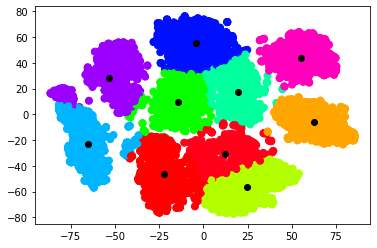

In [27]:
plt.scatter(data_TSNE[:, 0], data_TSNE[:, 1], c=ans, s=50, cmap='hsv')
plt.scatter([final_centroids[:, 0]], [final_centroids[:, 1]], c='black', alpha=1)

In [28]:
len(ans)

10000

In [29]:
with open('mnist_pca_tsne_pred_values.txt', 'w') as filehandle:
    for listitem in ans:
        filehandle.write('%s\n' % listitem)
    print("Wrote",len(ans),"items successfully to mnist_pca_tsne_pred_values.txt")

Wrote 10000 items successfully to mnist_pca_tsne_pred_values.txt


In [30]:
# SSE

sse = list()

for k in range(2,21,2):
    print("k = ",k)
    a,result,c,d = kmeans(data_TSNE, k)
    wcss = 0
    for i in range(len(result)):
        wcss += result[i,1]
    sse.append(wcss)

k =  2
k =  4
k =  6
k =  8
k =  10
k =  12
k =  14
k =  16
k =  18
k =  20


In [31]:
sse

[20649678.537189383,
 8245389.746145736,
 5706786.833717822,
 3428442.770646069,
 2626104.7997450954,
 2254637.940056967,
 1970820.9350746905,
 1589801.6552084351,
 1391253.7937242924,
 1245383.8175803474]

In [32]:
k_list = [i for i in range(2,21,2)]
k_list

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

([<matplotlib.axis.XTick at 0x7fe908f356a0>,
 <a list of 10 Text major ticklabel objects>)

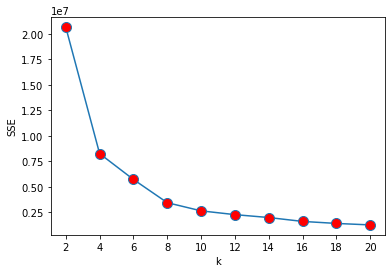

In [33]:
plt.plot(k_list, sse, marker='.', markerfacecolor='red', markersize=20)
plt.xlabel('k')
plt.ylabel('SSE')
plt.xticks(k_list)